In [ ]:
import pandas as pd

In [ ]:
dfts = pd.read_csv('sentiment_analysis.csv')

In [ ]:
dfts

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [ ]:
dfts.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
dfts.set_index("id")

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [ ]:
#!pip install contractions
#!pip install wordsegment
#!pip install pyspellchecker
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from contractions import contractions_dict
from nltk.stem import WordNetLemmatizer
import wordsegment


wordsegment.load()
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = text.lower()  #lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  #URLs
    text = re.sub(r'@\w+', '', text)  #mentions
    text = re.sub(r'#', '', text)  #hashtags
    text = re.sub(r'[^\w\s]', '', text)  #punctuation
    text = re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", text) #removes emojis
    text = re.sub(r'[^A-Za-z0-9_]', ' ', text)
    text = re.sub(r'\d+', '', text)#digits in the first of word
    text = re.sub(r'\s+', ' ', text).strip()# Remove extra whitespace
    return text

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        contraction = match.group(0)
        return contractions_dict.get(contraction, contraction)
    return contractions_re.sub(replace, text)

def reduce_repeated_characters(text):
    text = re.sub(r'(.)\1+', r'\1\1', text)
    return text

def clean_digits(text):
  return re.sub(r'\b[0-9]+\b\s*', '',text)

def clean_morespace(text):
  return re.sub(' +', ' ', text)

def segment_compound_word(text):
    segmented_text = []
    words = text.split()  # Split the text into individual words
    for word in words:
        segmented_word = wordsegment.segment(word)
        segmented_text.append(" ".join(segmented_word))
    return " ".join(segmented_text)

# Function to apply all cleaning steps
def clean_data(text):
    text = clean_text(text)
    text = clean_digits(text)
    text = reduce_repeated_characters(text)
    text = clean_morespace(text)
    text = segment_compound_word(text)
    text = expand_contractions(text)
    text = lemmatize_words(text)
    text = remove_stopwords(text)
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Clean the text
dfts['cleaned_text'] = dfts['tweet'].apply(clean_data)
print(dfts['cleaned_text'].head())

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk make memory unplug relax ph...
3    im wired know im george wa made way phone cute...
4    amazing service apple wont even talk question ...
Name: cleaned_text, dtype: object


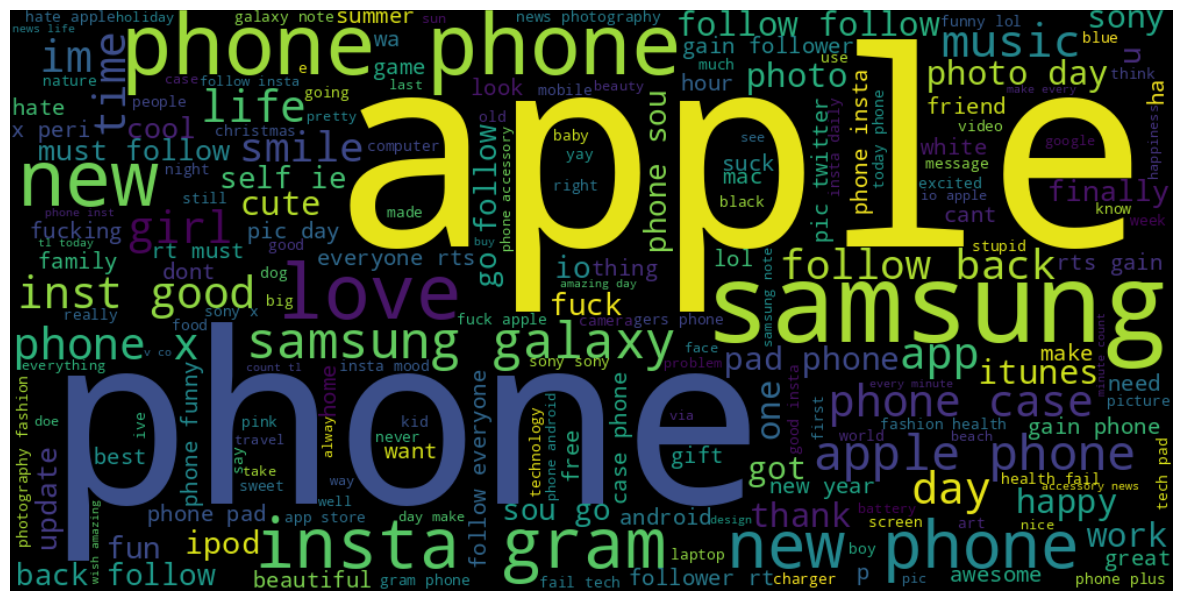

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all text data into a single string
text_data = ' '.join(dfts['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


In [ ]:
df_train['label']

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: object

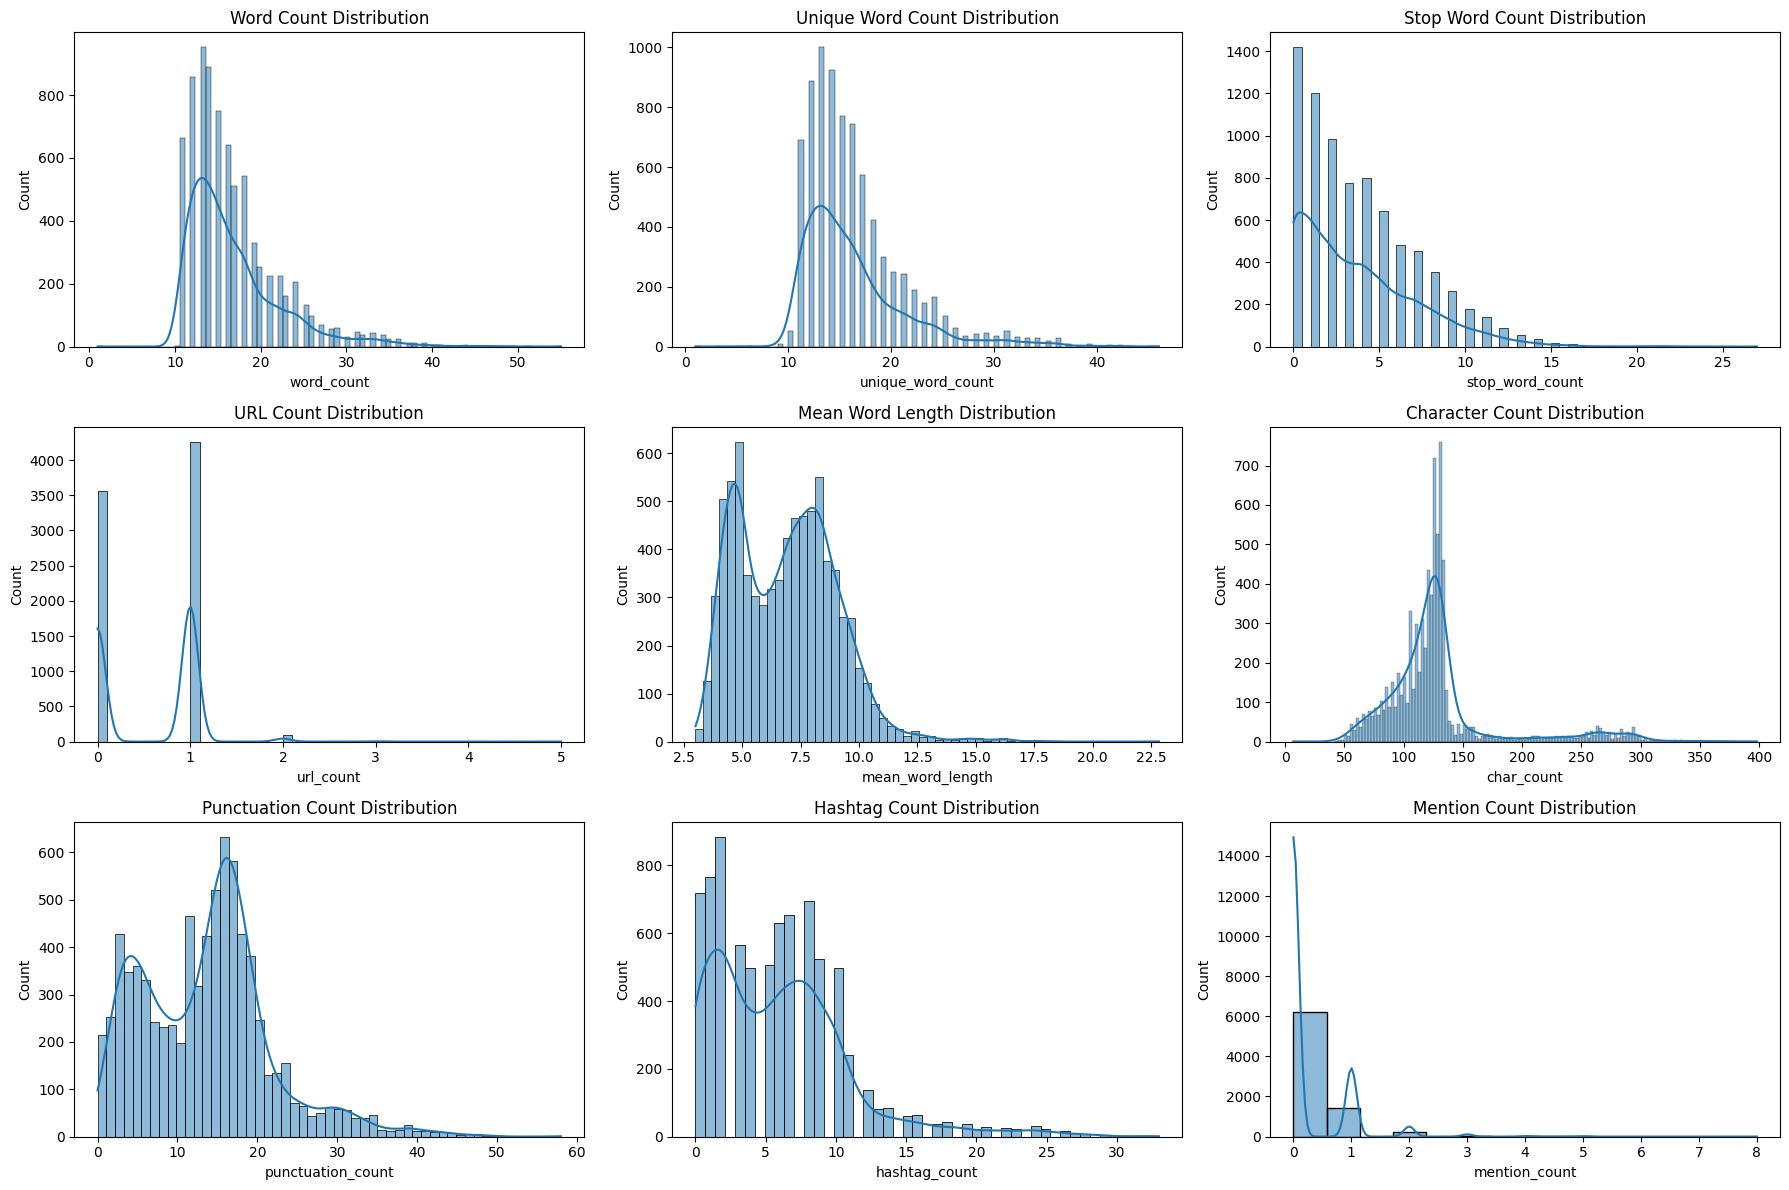

In [ ]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Function to calculate text-related features
def calculate_text_features(df):
    # Word count
    df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))

    # Unique word count
    df['unique_word_count'] = df['tweet'].apply(lambda x: len(set(str(x).split())))

    # Stop word count
    stop_words = set(stopwords.words('english'))
    df['stop_word_count'] = df['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

    # URL count
    df['url_count'] = df['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

    # Mean word length
    df['mean_word_length'] = df['tweet'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

    # Character count
    df['char_count'] = df['tweet'].apply(lambda x: len(str(x)))

    # Punctuation count
    df['punctuation_count'] = df['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

    # Hashtag count
    df['hashtag_count'] = df['tweet'].apply(lambda x: len([c for c in str(x) if c == '#']))

    # Mention count
    df['mention_count'] = df['tweet'].apply(lambda x: len([c for c in str(x) if c == '@']))


    return df

# Load your train dataset
df_train = dfts  # Adjust file path as necessary

# Calculate text-related features
df_train = calculate_text_features(df_train)


# Plot distributions of text-related features
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)
sns.histplot(df_train['word_count'], kde=True, multiple='stack')
plt.title('Word Count Distribution')
plt.subplot(3, 3, 2)
sns.histplot(df_train['unique_word_count'], kde=True, multiple='stack')
plt.title('Unique Word Count Distribution')
plt.subplot(3, 3, 3)
sns.histplot(df_train['stop_word_count'], kde=True, multiple='stack')
plt.title('Stop Word Count Distribution')
plt.subplot(3, 3, 4)
sns.histplot(df_train['url_count'], kde=True, multiple='stack')
plt.title('URL Count Distribution')
plt.subplot(3, 3, 5)
sns.histplot(df_train['mean_word_length'], kde=True, multiple='stack')
plt.title('Mean Word Length Distribution')
plt.subplot(3, 3, 6)
sns.histplot(df_train['char_count'], kde=True, multiple='stack')
plt.title('Character Count Distribution')
plt.subplot(3, 3, 7)
sns.histplot(df_train['punctuation_count'], kde=True, multiple='stack')
plt.title('Punctuation Count Distribution')
plt.subplot(3, 3, 8)
sns.histplot(df_train['hashtag_count'], kde=True, multiple='stack')
plt.title('Hashtag Count Distribution')
plt.subplot(3, 3, 9)
sns.histplot(df_train['mention_count'], kde=True, multiple='stack')
plt.title('Mention Count Distribution')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(dfts['cleaned_text'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = X_tfidf.toarray()
DF1 = pd.DataFrame(vectorizer_features,columns=tfidf_vect.get_feature_names_out())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer()

vectorizer_features1 = vectorizer.fit_transform(dfts['cleaned_text'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features1 = vectorizer_features1.toarray()
DF2 = pd.DataFrame(vectorizer_features1,columns=vectorizer.get_feature_names_out())

In [ ]:
import nltk
from nltk.corpus import words, wordnet

nltk.download('words')
nltk.download('wordnet')

# Load English words
english_words = set(words.words())

# Load French and Spanish words from WordNet synsets
french_synsets = wordnet.synsets('french')
french_words = set()
for synset in french_synsets:
    french_words.update([lemma.name().lower() for lemma in synset.lemmas()])

spanish_synsets = wordnet.synsets('spanish')
spanish_words = set()
for synset in spanish_synsets:
    spanish_words.update([lemma.name().lower() for lemma in synset.lemmas()])

# Combine words from all three languages into a single set
english_french_spanish_words = english_words.union(french_words, spanish_words)

# Step 2: Filter columns based on English dictionary
columns1 = [col for col in DF1.columns if col.lower() in english_french_spanish_words]
columns2 = [col for col in DF2.columns if col.lower() in english_french_spanish_words]


# Step 3: Select only columns with English words
DF3 = DF1[columns1]
DF4 = DF2[columns2]

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
DF1.head()

,aa,aah,aahh,aalborg,aaliyah,aapl,aarhus,aaron,aarp,ab,...,zpictwittercomhnzltjvn,zpictwittercomnlmqvrxzv,zpictwittercompdsmtuiufx,zu,zum,zurich,zx,zy,zz,zzy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DF2.head()

,aa,aah,aahh,aalborg,aaliyah,aapl,aarhus,aaron,aarp,ab,...,zpictwittercomhnzltjvn,zpictwittercomnlmqvrxzv,zpictwittercompdsmtuiufx,zu,zum,zurich,zx,zy,zz,zzy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
DF3.head()

,aa,aba,abb,ability,able,aboard,absence,absolute,absolutely,absurd,...,zero,zeta,zing,zip,zipper,zo,zombie,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DF4.head()

,aa,aba,abb,ability,able,aboard,absence,absolute,absolutely,absurd,...,zero,zeta,zing,zip,zipper,zo,zombie,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y1=dfts['label']

In [ ]:
dfs = [DF1,DF2,DF3,DF4]

In [ ]:
import pandas as pd
import numpy as np
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
k=1
for df in dfs:
  print("DF"+str(k))
  k+=1
  x1 = df
  x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)
  acc = []
  f1 = []
    # Gaussian naive bayes
  Gaussianed_1 = GaussianNB()
  Gaussianed_1.fit(x_train1, y_train1);
  acc.append(Gaussianed_1.score(x_test1,y_test1))
  f1.append(f1_score(y_test1, Gaussianed_1.predict(x_test1), average='weighted') )
    # Support Vector Machine
  SVM_1 = SVC()
  SVM_1.fit(x_train1, y_train1)
  acc.append(SVM_1.score(x_test1,y_test1))
  f1.append(f1_score(y_test1, SVM_1.predict(x_test1), average='weighted') )
    # Logistic regression
  Logic_1 = LogisticRegression()
  Logic_1.fit(x_train1, y_train1);
  acc.append(Logic_1.score(x_test1,y_test1))
  f1.append(f1_score(y_test1, Logic_1.predict(x_test1), average='weighted') )
    # Decision tree
  Tree_1 = DecisionTreeClassifier()
  Tree_1.fit(x_train1, y_train1);
  acc.append(Tree_1.score(x_test1,y_test1))
  f1.append(f1_score(y_test1, Tree_1.predict(x_test1), average='weighted') )
    # Random forest
  Forest = RandomForestClassifier()
  Forest.fit(x_train1, y_train1)
  acc.append(Forest.score(x_test1,y_test1))
  f1.append(f1_score(y_test1, Forest.predict(x_test1), average='weighted') )
    #gb
  gb = GradientBoostingClassifier()
  gb.fit(x_train1, y_train1)
  acc.append(gb.score(x_test1,y_test1))
  f1.append(f1_score(y_test1, gb.predict(x_test1), average='weighted') )

  # MNB
  mnb = MultinomialNB(alpha=2)
  mnb.fit(x_train1, y_train1)
  acc.append(mnb.score(x_test1,y_test1))
  f1.append(f1_score(y_test1, mnb.predict(x_test1), average='weighted') )

  model_names = ['Gaussian NB', 'SVM', 'LR', 'DT','RF','GB','MNB']

  accuracy_record = pd.DataFrame({'Model': model_names, 'acc': acc})
  accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
  accuracy_record.set_index('Model', inplace=True)
  accuracy_record.loc['avg'] = accuracy_record.mean()

  F1_record = pd.DataFrame({'Model': model_names, 'f1': f1})
  F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
  F1_record.set_index('Model', inplace=True)
  F1_record.loc['avg'] = F1_record.mean()

  print(accuracy_record)
  print('\n')
  print(F1_record)

DF1


<ipython-input-288-752a76785d5f>:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
<ipython-input-288-752a76785d5f>:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)


                  acc  acc_mean
Model                          
Gaussian NB  0.785354  0.790000
SVM          0.876768  0.880000
LR           0.871212  0.870000
DT           0.833333  0.830000
RF           0.872727  0.870000
GB           0.850505  0.850000
MNB          0.813131  0.810000
avg          0.843290  0.842857


                   f1   F1_mean
Model                          
Gaussian NB  0.791659  0.790000
SVM          0.873473  0.870000
LR           0.864667  0.860000
DT           0.830609  0.830000
RF           0.868565  0.870000
GB           0.837572  0.840000
MNB          0.777128  0.780000
avg          0.834810  0.834286
DF2


<ipython-input-288-752a76785d5f>:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
<ipython-input-288-752a76785d5f>:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)


                  acc  acc_mean
Model                          
Gaussian NB  0.789899  0.790000
SVM          0.885859  0.890000
LR           0.888384  0.890000
DT           0.836869  0.840000
RF           0.880303  0.880000
GB           0.850000  0.850000
MNB          0.890404  0.890000
avg          0.860245  0.861429


                   f1  F1_mean
Model                         
Gaussian NB  0.796847     0.80
SVM          0.884757     0.88
LR           0.887427     0.89
DT           0.835816     0.84
RF           0.877642     0.88
GB           0.836748     0.84
MNB          0.891846     0.89
avg          0.858726     0.86
DF3


<ipython-input-288-752a76785d5f>:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
<ipython-input-288-752a76785d5f>:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)


                  acc  acc_mean
Model                          
Gaussian NB  0.718182  0.720000
SVM          0.873232  0.870000
LR           0.851010  0.850000
DT           0.823232  0.820000
RF           0.859091  0.860000
GB           0.836869  0.840000
MNB          0.790404  0.790000
avg          0.821717  0.821429


                   f1  F1_mean
Model                         
Gaussian NB  0.733939     0.73
SVM          0.869251     0.87
LR           0.840130     0.84
DT           0.821398     0.82
RF           0.852883     0.85
GB           0.817950     0.82
MNB          0.739245     0.74
avg          0.810685     0.81
DF4
                  acc  acc_mean
Model                          
Gaussian NB  0.719697  0.720000
SVM          0.874242  0.870000
LR           0.870202  0.870000
DT           0.824747  0.820000
RF           0.864141  0.860000
GB           0.834848  0.830000
MNB          0.882828  0.880000
avg          0.838672  0.835714


                   f1   F1_mean
Model     

<ipython-input-288-752a76785d5f>:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
<ipython-input-288-752a76785d5f>:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
